# More Comments OR More Points: Exploring Hacker News Posts

## Objective

In this project we will be exploring the 2016 Hacker News dataset. Hacker News is a site started by an incubator Y combinator where user submitted posts are voted and commented upon similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result. The original dataset can be downloaded from this [link](https://www.kaggle.com/hacker-news/hacker-news-posts). This dataset contains 300,000 rows but, the dataset that we are using in analysis has been reduced to 20,000 rows as we are not interested in submissions that did not receive any comments.

I want my submission on hacker news to get the most comments and points and for that I need to get the answers for the following questions while I am analyzing my dataset.
<ul>
    <li>Do Ask HN or Show HN receive more comments on average?</li>
    <li>Do posts created at a certain time receive more comments on average?</li>
    <li>Do Ask HN or Show HN receive more points on average?</li>
    <li>Do posts created at a certain time receive more comments on average?</li>
</ul>


## Data Exploration

In [1]:
#Importing necessary libraries
from csv import reader
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
opened_file=open("hacker_news.csv") #opening the csv file
hn=list(reader(opened_file)) #converting it to a list
print('columns:- ') #printing out the column names
print(hn[0])
hn_wout_headers=hn[1:] #separating column names from the dataset


columns:- 
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


Columns num_points , num_comments, and created_at seem important for this analysis

## Data Filteration

In [3]:
#Separating Ask and Show posts
ask_posts=[]#A list containg all the details about Ask posts
show_posts=[]#A list containing all the details about Show posts
other_posts=[]#A list containing all the details about posts other than Ask or Show

#Separating the posts into different lists
for row in hn_wout_headers:
    title=row[1]
    title=title.lower()
    if title.startswith("ask hn"):
        ask_posts.append(row)
    elif title.startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
        
print("Number of Ask Posts: ",len(ask_posts))
print("Number of Show Posts: ",len(show_posts))
print("Number of Other Posts: ",len(other_posts))

Number of Ask Posts:  1744
Number of Show Posts:  1162
Number of Other Posts:  17194


At Hacker News the posts can be classified into 3 main types: Ask, Show, and others. By running the above loop we have counted all the posts whose title contains 'ask hn' or 'show hn'. The title can contain ask or show in both uppercase as well as lowercase due to which I converted the title to lowercase and then checked whether it starts with 'ask hn' or 'show hn'. 

## Data Analysis

### Part One

I have created a function analyze_posts that takes in a list of posts,and the column number which I have to analyze. It returns the total, and average number of the given index.

In [4]:
#Identifying the type having the highest number of comments.
def analyze_posts(posts,index):
    total_number_of_vals=0
    for row in posts:
        vals=float(row[index])
        total_number_of_vals+=vals
    avg_ask_vals=total_number_of_vals/len(posts)
    return total_number_of_vals,avg_ask_vals

print("Analysis According to Comments:\n")
print("Ask Post: ",analyze_posts(ask_posts,4))
print("Show Post: ",analyze_posts(show_posts,4))
print("Other Post: ",analyze_posts(other_posts,4))

Analysis According to Comments:

Ask Post:  (24483.0, 14.038417431192661)
Show Post:  (11988.0, 10.31669535283993)
Other Post:  (462055.0, 26.8730371059672)


Among Ask and Show posts Ask posts have the highest number of comments (24483.0) , and average number of comments (14.038). 

### Part Two: Comparing Comments of Show Post and Ask Post

I am using both Ask, and Show posts for the rest of the analysis. Now I am interested in knowing the time when most posts were made along with the time when most comments were made. These results will give me an idea of user engagement on Hacker News.

In [5]:
#Finding the amount of ask posts and comments 
def extract_useful(dataset,index):
    result_list=[]
    for row in dataset:
        data=[]
        created_at=row[6]
        comments=float(row[index])
        data.append(created_at)
        data.append(comments)
        result_list.append(data)
    return result_list

def freq(dataset,index):
    counts_by_hour={} #Dictionary that would contain the number of posts for a particular hour.
    comments_by_hour={} #Dictionary that would contain the comments on a post for a particular hour.
    useful_data=extract_useful(dataset,index)
    for data in useful_data:
        date=data[0]
        dt_object=dt.datetime.strptime(date,"%m/%d/%Y %H:%M")
        dt_string=dt_object.strftime("%H")
        if dt_string in counts_by_hour:
            counts_by_hour[dt_string]+=1
            comments_by_hour[dt_string]+=data[1]
        else:
            counts_by_hour[dt_string]=1
            comments_by_hour[dt_string]=data[1]
    return counts_by_hour,comments_by_hour
        
#Ask Posts
counts_by_hour_ask,comments_by_hour_ask=freq(ask_posts,4)
#Show Posts
counts_by_hour_show,comments_by_hour_show=freq(show_posts,4)



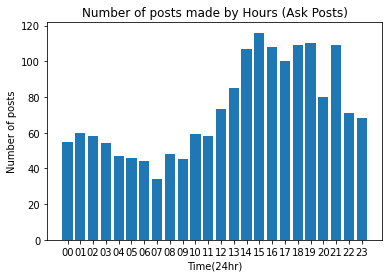

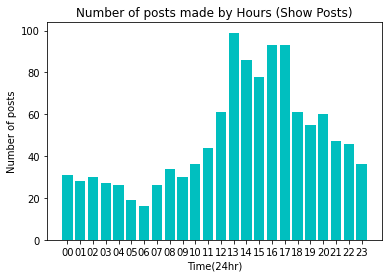

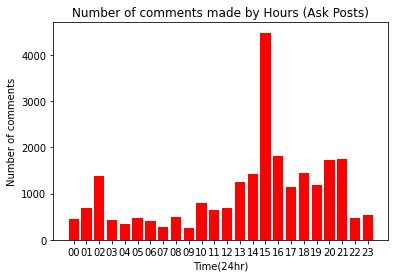

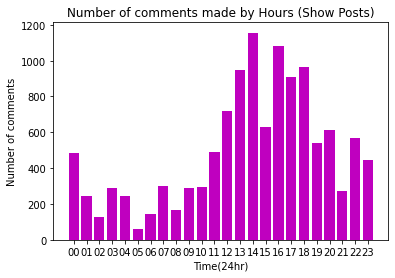

In [6]:
sorted_keys_ask=sorted(counts_by_hour_ask.keys())
sorted_keys_show=sorted(counts_by_hour_show.keys())
def sorted_vals(sorted_keys,data):
    sorted_count=[]
    for key in sorted_keys:
        sorted_count.append(data[key])
    return sorted_count

#Plotting the number of posts
plt.bar(range(len(counts_by_hour_ask)),sorted_vals(sorted_keys_ask,counts_by_hour_ask),tick_label=sorted_keys_ask)
plt.title('Number of posts made by Hours (Ask Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of posts')
plt.show()
#Plotting the number of posts
plt.bar(range(len(counts_by_hour_show)),sorted_vals(sorted_keys_show,counts_by_hour_show),tick_label=sorted_keys_ask,color='c')
plt.title('Number of posts made by Hours (Show Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of posts')
plt.show()
#Plotting comments on a post
plt.bar(range(len(comments_by_hour_ask)),sorted_vals(sorted_keys_ask,comments_by_hour_ask),tick_label=sorted_keys_ask,color='r')
plt.title('Number of comments made by Hours (Ask Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of comments')
plt.show()
#Plotting comments on a post
plt.bar(range(len(comments_by_hour_show)),sorted_vals(sorted_keys_show,comments_by_hour_show),tick_label=sorted_keys_show,color='m')
plt.title('Number of comments made by Hours (Show Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of comments')
plt.show()

By observing both the graphs for Ask Posts it seems that user engagement is at its peak between 1400-1900. However, we can see that user engagement shoots off the chart at 1500 as the number of comments made are 2000 more than hour before or after it. 

By observing the graphs of Show Posts, it seems that the trend of number of posts made by hours for Show and Ask posts is the same however, it has a less steeper decline after it hits its maximum compared to Show Posts graph that falls sharply after it hits its maximum at 1300. The trend for the number of comments graph for both Show and Ask posts is the same but the number of comments for Ask posts are affected by the sharp increase at 1500 that has greatly impacted its average. However, we exclude this line then trend for the posts is exactly the same. Still neither number of posts nor number of comments alone can identify the prime time to make a post and grab the attention. What I think I need is the number of comments per post for that particular hour?

### Part three

Now we will be calculating the average number of comments for both Ask and Show HN posts by hour. The task will be performed using a for-loop and the results will be stored in the form of a dictionary.

In [7]:
#Calculating the Average Number of Comments for Ask HN Posts by Hour
def avg_by_hour(comments_by_hour,counts_by_hour):
    avg_by_hour={} #Dictionary that would contain the average number of comments for Ask HN posts by Hour

    for key in counts_by_hour:
        avg_by_hour[key]=comments_by_hour[key]/counts_by_hour[key]
    return avg_by_hour
avg_by_hour_ask=avg_by_hour(comments_by_hour_ask,counts_by_hour_ask)
avg_by_hour_show=avg_by_hour(comments_by_hour_show,counts_by_hour_show)

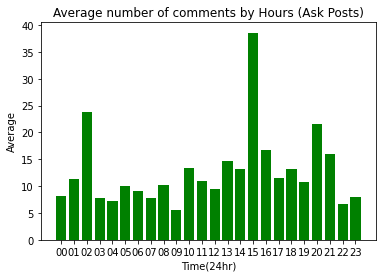

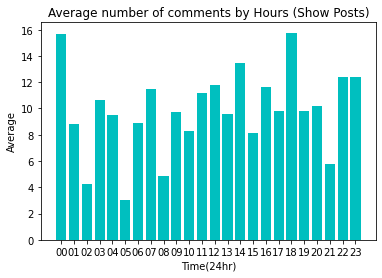

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


Top 5 Hours for Show Posts Comments
18:00: 15.77 average comments per post
00:00: 15.71 average comments per post
14:00: 13.44 average comments per post
23:00: 12.42 average comments per post
22:00: 12.39 average comments per post


In [8]:
#Plotting average number of comments on a post by hour.
plt.bar(range(len(avg_by_hour_ask)),sorted_vals(sorted_keys_ask,avg_by_hour_ask),tick_label=sorted_keys_ask,color='g')
plt.title('Average number of comments by Hours (Ask Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Average')
plt.show()

#Plotting average number of comments on a post by hour.
plt.bar(range(len(avg_by_hour_show)),sorted_vals(sorted_keys_show,avg_by_hour_show),tick_label=sorted_keys_show,color='c')
plt.title('Average number of comments by Hours (Show Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Average')
plt.show()
#Extracting the top 5 hours with a high user engagement.
swap_avg_by_hour_ask=[]
for key in avg_by_hour_ask:
    temp_list=[]
    temp_list.append(avg_by_hour_ask[key])
    temp_list.append(key)
    swap_avg_by_hour_ask.append(temp_list)
    
#Extracting the top 5 hours with a high user engagement.
swap_avg_by_hour_show=[]
for key in avg_by_hour_show:
    temp_list=[]
    temp_list.append(avg_by_hour_show[key])
    temp_list.append(key)
    swap_avg_by_hour_show.append(temp_list)
    
sorted_swap_ask=sorted(swap_avg_by_hour_ask,reverse=True)
sorted_swap_show=sorted(swap_avg_by_hour_show,reverse=True)

print("Top 5 Hours for Ask Posts Comments")
string_format="{time}: {val:.2f} average comments per post"
for row in sorted_swap_ask[:5]:
    date=row[1]
    val=row[0]
    dt_object=dt.datetime.strptime(date,"%H")
    dt_string=dt_object.strftime("%H:%M")
    print(string_format.format(time=dt_string,val=val))

print("\n")
    
print("Top 5 Hours for Show Posts Comments")
string_format="{time}: {val:.2f} average comments per post"
for row in sorted_swap_show[:5]:
    date=row[1]
    val=row[0]
    dt_object=dt.datetime.strptime(date,"%H")
    dt_string=dt_object.strftime("%H:%M")
    print(string_format.format(time=dt_string,val=val))
    

    
    
    
    

The graph's show that the average number of comments for Ask posts are much greater than that of Show Posts. The top 5 hours also tell us that with an Ask post there is a greater chance of getting many comments than a Show post. So if I want more comments I would go for the Ask post.

## Comparing Points of Show & Ask Posts

### Part One

Now I will be comparing show and ask posts to determine which post has more points on average.

In [9]:
def analyze_points(posts):
    total_number_of_points=0
    for row in posts:
        points=float(row[3])
        total_number_of_points+=points
    avg_ask_points=total_number_of_points/len(posts)
    return total_number_of_points,avg_ask_points

print("Show Posts: ",analyze_posts(show_posts,3))
print("Ask Posts: ",analyze_posts(ask_posts,3))

Show Posts:  (32019.0, 27.555077452667813)
Ask Posts:  (26268.0, 15.061926605504587)


The above data suggests that on average Show posts receive a greater number of points than Ask posts. This means that with a show post I have a greater chance of boosting my profile and gaining some followers. Logically, creating Show posts is more difficult because you have to share some valuable information with the Hacker News Commmunity. Ask posts are simply questions about certain technology, startup, or framework. It is easier to ask questions than creating new content as new content requires alot of effort, and research. 

### Part Two

Before making any decision on whether to go for show or ask points I think it is better to analyze that at which specific hour of the day I am mopre likely to get more points by either show or ask posts.

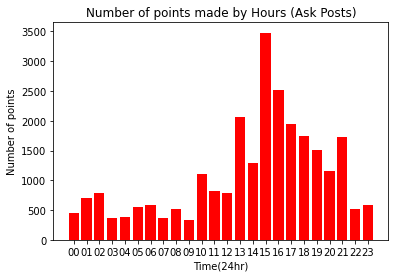

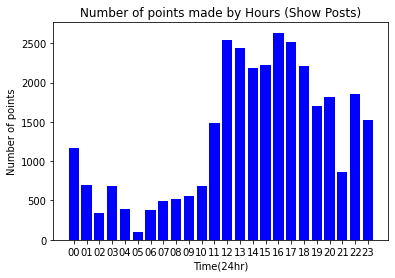

In [10]:
counts_by_hour_ask_points,points_by_hour_ask=freq(ask_posts,3)
counts_by_hour_show_points,points_by_hour_show=freq(show_posts,3)
sorted_keys_ask_points=sorted(counts_by_hour_ask_points.keys())
sorted_keys_show_points=sorted(counts_by_hour_show_points.keys())

#Plotting points on a post
plt.bar(range(len(points_by_hour_ask)),sorted_vals(sorted_keys_ask_points,points_by_hour_ask),tick_label=sorted_keys_ask_points,color='r')
plt.title('Number of points made by Hours (Ask Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of points')
plt.show()

#Plotting points on a post
plt.bar(range(len(points_by_hour_show)),sorted_vals(sorted_keys_show_points,points_by_hour_show),tick_label=sorted_keys_show_points,color='b')
plt.title('Number of points made by Hours (Show Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of points')
plt.show()

In the show posts graph we can see a curve in the beginning that hits its lowest point at 0500 after this it takes off from 100 points to 1500 points. The number of points keep on increasing to 2500 at 1600 after this it steadily decreases and sees another dip at 2100 which is shortlived as it ends the day at 1500 points. However, in the ask posts graph it starts off with an increasing trend but soon sees a dip at 0300 after this there are several ups and downs untill it takes off at 1000 and goes from 1100 points to 3400 points. This take-off is short lived and it soon falls off gradually to 500 points as midnight approaches.

Inorder to score more points with the Ask posts I should target the 1400-1700 area where as for the show posts I should target the 1200 to 2000 area. To understand why these time periods it is better to think what people are generally doing in these time periods. If I look at the Ask post during 1400-1700 people are working so during work they can encounter problems, search for solutions, and if they fine a good one then they will reward it with points. However, after 1700 for people working in offices to go home and even people working from home generally don't work after 1700 till the next one or two hours.

Now with the Show posts 1200 to 2000 area, people are generally reading for work, and also to relax. There are people who read these posts just to get new ideas when they are not working.

### Part Three

Now we have to analyze the average number of points by hours of both the posts.

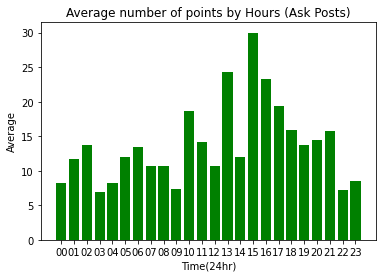

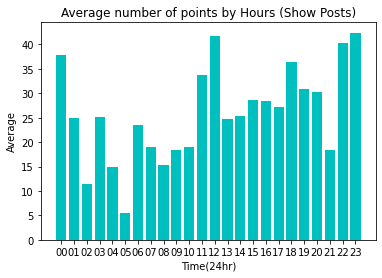

Top 5 Hours for Ask Posts Points
15:00: 29.99 average points per post
13:00: 24.26 average points per post
16:00: 23.35 average points per post
17:00: 19.41 average points per post
10:00: 18.68 average points per post


Top 5 Hours for Show Posts Points
23:00: 42.39 average points per post
12:00: 41.69 average points per post
22:00: 40.35 average points per post
00:00: 37.84 average points per post
18:00: 36.31 average points per post


In [11]:
avg_by_hour_points_ask=avg_by_hour(points_by_hour_ask,counts_by_hour_ask_points)
avg_by_hour_points_show=avg_by_hour(points_by_hour_show,counts_by_hour_show_points)

#Plotting average number of comments on a post by hour.
plt.bar(range(len(avg_by_hour_points_ask)),sorted_vals(sorted_keys_ask_points,avg_by_hour_points_ask),tick_label=sorted_keys_ask_points,color='g')
plt.title('Average number of points by Hours (Ask Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Average')
plt.show()

#Plotting average number of comments on a post by hour.
plt.bar(range(len(avg_by_hour_points_show)),sorted_vals(sorted_keys_show_points,avg_by_hour_points_show),tick_label=sorted_keys_show_points,color='c')
plt.title('Average number of points by Hours (Show Posts)')
plt.xlabel('Time(24hr)')
plt.ylabel('Average')
plt.show()
#Extracting the top 5 hours with a high user engagement.
swap_avg_by_hour_ask_points=[]
for key in avg_by_hour_points_ask:
    temp_list=[]
    temp_list.append(avg_by_hour_points_ask[key])
    temp_list.append(key)
    swap_avg_by_hour_ask_points.append(temp_list)
    
#Extracting the top 5 hours with a high user engagement.
swap_avg_by_hour_show_points=[]
for key in avg_by_hour_points_show:
    temp_list=[]
    temp_list.append(avg_by_hour_points_show[key])
    temp_list.append(key)
    swap_avg_by_hour_show_points.append(temp_list)
    
sorted_swap_ask_points=sorted(swap_avg_by_hour_ask_points,reverse=True)
sorted_swap_show_points=sorted(swap_avg_by_hour_show_points,reverse=True)

print("Top 5 Hours for Ask Posts Points")
string_format="{time}: {val:.2f} average points per post"
for row in sorted_swap_ask_points[:5]:
    date=row[1]
    val=row[0]
    dt_object=dt.datetime.strptime(date,"%H")
    dt_string=dt_object.strftime("%H:%M")
    print(string_format.format(time=dt_string,val=val))

print("\n")
    
print("Top 5 Hours for Show Posts Points")
string_format="{time}: {val:.2f} average points per post"
for row in sorted_swap_show_points[:5]:
    date=row[1]
    val=row[0]
    dt_object=dt.datetime.strptime(date,"%H")
    dt_string=dt_object.strftime("%H:%M")
    print(string_format.format(time=dt_string,val=val))


The graph's show that the average number of points for Show posts are much greater than that of Ask Posts. The top 5 hours also tell us that with a Show post there is a greater chance of getting many points than a Ask post. So if I want more points I would go for the Show post

## Conclusion

Both Ask and Show post have diferent purposes and their different nature is also visible in the analysis above as Ask post has more comments while Show post has more points. Therefore, the decision of choosing one over the other depends upon what I intend to achieve, do I need more comments or more points? Besides the intention I also have to look at the underlying effort involved in creating these posts. It seems that Show post requires more hardwork than Ask posts. 

After looking at the plots and the details above it seems that the ideal time to create an ask post would be between 3pm-5pm or 7pm-9pm Eastern Time US. Now I live in Pakistan therefore I have to create an ask post between 12am-2am or 4am-6am because my timezone is 9 hours ahead of the Eastern Timezone US. According to the analysis above any 'Ask' post created during this time would engage a larger audience and get me more comments.

Similarly, the ideal to create a Show post would be between 10pm-12am or 12pm-6pm Eastern Time US. In Pakistan I have to create a show post between 7am-9am or 9pm-3am. According to the analysis above any 'Show' post created during this time would engage a larger audience and get me more points.

Now that I have decided on the ideal time to upload any post I think it would be better to start working on some content.